## Aula 16 - Detecção de Contornos e Aproximação Poligonal

### Detecção de Contornos

Começamos importando as bibliotecas necessárias:

In [1]:
%matplotlib inline
import cv2 # OpenCV
import matplotlib.pyplot as plt # Matplotlib
import numpy as np # Numpy

Existem várias aplicações para a detecção de contornos. Neste primeiro exemplo, vamos usar esta técnica para contar objetos em uma imagem.

Iniciamos carregando a imagem de testes:

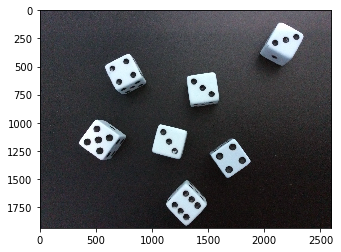

In [2]:
img = cv2.imread('dados.jpg')
plt.imshow(img)

O segundo passo é binarizar a imagem. Esse passo não é obrigatório, mas melhora muito a qualidade da técnica. Antes, vamos suavizar a imagem para nos livrar de ruído:

In [3]:
cinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
borrado = cv2.GaussianBlur(cinza, (5, 5), 0)
binario = cv2.threshold(borrado, 200, 255, cv2.THRESH_BINARY)

Essa é a nossa nova imagem:

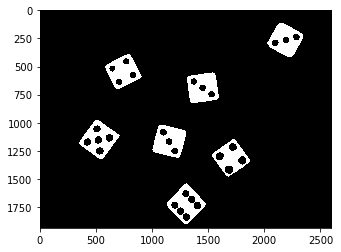

In [4]:
plt.imshow(binario[1], cmap="gray")

Com a imagem binarizada podemos usar o método [cv2.findCountours()](https://docs.opencv.org/3.4/d3/dc0/group__imgproc__shape.html#ga17ed9f5d79ae97bd4c7cf18403e1689a) para encontrar os contornos da imagem. 

In [5]:
contornos, _ = cv2.findContours(binario[1], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

A partir daí, já podemos contar quantos dados temos na imagem:

In [6]:
print("Encontrados %d objetos!" % len(contornos))
for (i, c) in enumerate(contornos):
    print("\tTamanho do contorno %d: %d" % (i, len(c)))

Encontrados 7 objetos!
	Tamanho do contorno 0: 423
	Tamanho do contorno 1: 476
	Tamanho do contorno 2: 497
	Tamanho do contorno 3: 456
	Tamanho do contorno 4: 327
	Tamanho do contorno 5: 620
	Tamanho do contorno 6: 570


Podemos, agora, desenhá-los na imagem:

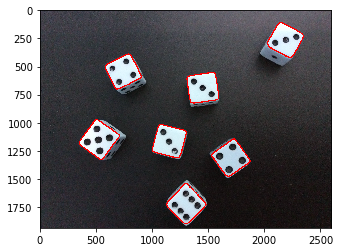

In [7]:
img_contornos = img.copy()

img_contornos = cv2.drawContours(img_contornos, contornos, -1, (255, 0, 0), 10)
plt.imshow(img_contornos)

### Convex Hull

Para o Convex Hull, vamos seguir o passo-a-passo descrito na aula:
0. Carregar a imagem;
1. Tons de cinza;
2. Borramento;
3. Binarização;
4. Encontrar os contornos;
5. Encontrar e desenhar o fechamento convexo.

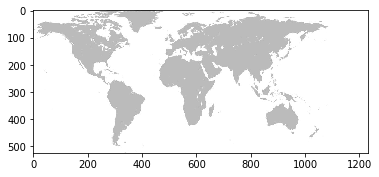

In [8]:
img = cv2.imread('mundo.jpg', 1)
plt.imshow(img)

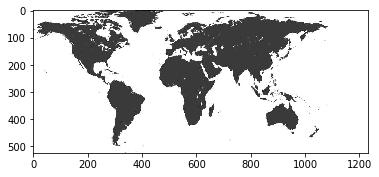

In [9]:
img_cinza = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_cinza, cmap="gray")

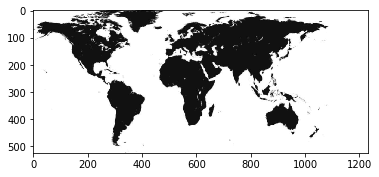

In [10]:
borrada = cv2.blur(img_cinza, (3, 3))
plt.imshow(borrada, cmap="gray")

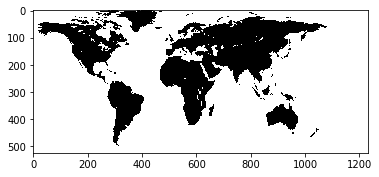

In [11]:
ret, binarizada = cv2.threshold(borrada, 200, 255, cv2.THRESH_BINARY)
plt.imshow(binarizada, cmap="gray")

In [12]:
contornos, hierarquia = cv2.findContours(binarizada, cv2.RETR_TREE, \
            cv2.CHAIN_APPROX_SIMPLE)

hull = []
for i in range(len(contornos)):
    hull.append(cv2.convexHull(contornos[i], False))

In [13]:
resultado = np.zeros((binarizada.shape[0], binarizada.shape[1], 3), np.uint8)

In [14]:
for i in range(len(contornos)):
    cv2.drawContours(resultado, contornos, i, (0, 255, 0), 2, 8, hierarquia)
    cv2.drawContours(resultado, hull, i, (255, 255, 255), 2, 8)

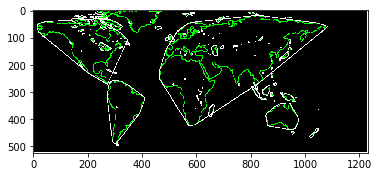

In [15]:
plt.imshow(resultado)

### Casamento de Formas

Usamos o mesmo pipeline das técnicas anteriores, encontrando primeiro os contornos e depois comparando-os usando o método **cv2.matchShapes()**. A saída é a proximidade das formas.

In [16]:
import cv2
import numpy as np

img1 = cv2.imread('forma1.jpg',0)
img2 = cv2.imread('forma2.jpg',0)

# Imagem 1 com ela mesma:

ret, bina = cv2.threshold(img1, 127, 255,0)
ret, bina2 = cv2.threshold(img1, 127, 255,0)
contornos,hierarquia = cv2.findContours(bina,2,1)
cnt1 = contornos[0]
contornos,hierarquia = cv2.findContours(bina2,2,1)
cnt2 = contornos[0]

ret = cv2.matchShapes(cnt1,cnt2,1,0.0)
print("Imagem 1 com ela mesma: ", ret)

# Imagem 1 com a 2:

ret, bina = cv2.threshold(img1, 127, 255,0)
ret, bina2 = cv2.threshold(img2, 127, 255,0)
contornos,hierarquia = cv2.findContours(bina,2,1)
cnt1 = contornos[0]
contornos,hierarquia = cv2.findContours(bina2,2,1)
cnt2 = contornos[0]

ret = cv2.matchShapes(cnt1,cnt2,1,0.0)
print("Imagem 1 com a 2: ", ret)

# Imagem 2 com ela mesma:

ret, bina = cv2.threshold(img2, 127, 255,0)
ret, bina2 = cv2.threshold(img2, 127, 255,0)
contornos,hierarquia = cv2.findContours(bina,2,1)
cnt1 = contornos[0]
contornos,hierarquia = cv2.findContours(bina2,2,1)
cnt2 = contornos[0]

ret = cv2.matchShapes(cnt1,cnt2,1,0.0)
print("Imagem 2 com ela mesma: ", ret)

Imagem 1 com ela mesma:  0.0
Imagem 1 com a 2:  0.0006329309801681449
Imagem 2 com ela mesma:  0.0
